# Regression in DL with TensorFlow

In [2]:
# import library for regression problem
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
print('tensorflow:',tf.__version__)

tensorflow: 2.10.0


In [3]:
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
# preprocessing
X = df.drop('price',axis=1)
y= df['price']

# encode the categorical variable 
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# Train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Standard the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
# create neural network 
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]), # input layer without any activation function
    tf.keras.layers.Dense(16,activation='relu'), #hidden layer with 16 neurons and relu function 
    tf.keras.layers.Dense(1) # output layer with 1 neuron
])

In [6]:
# compile the model 
model.compile(optimizer='adam',loss='mean_squared_error'
)

In [7]:
# train the model 
#model.fit(X_train,y_train,epochs=100,batch_size=32,verbose=1)

its take uhuge time on my machine now we train the model with the validation data 

In [8]:
model.fit(X_train,y_train,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
1079/1079 [==============================] - 53s 42ms/step - loss: 31009942.0000 - val_loss: 30797006.0000
Epoch 2/10
1079/1079 [==============================] - 44s 40ms/step - loss: 29226524.0000 - val_loss: 28239358.0000
Epoch 3/10
1079/1079 [==============================] - 46s 43ms/step - loss: 26157528.0000 - val_loss: 24648096.0000
Epoch 4/10
1079/1079 [==============================] - 49s 45ms/step - loss: 22275282.0000 - val_loss: 20430110.0000
Epoch 5/10
1079/1079 [==============================] - 51s 47ms/step - loss: 18096554.0000 - val_loss: 16191029.0000
Epoch 6/10
1079/1079 [==============================] - 54s 50ms/step - loss: 14093352.0000 - val_loss: 12293215.0000
Epoch 7/10
1079/1079 [==============================] - 44s 41ms/step - loss: 10578005.0000 - val_loss: 9018005.0000
Epoch 8/10
1079/1079 [==============================] - 48s 44ms/step - loss: 7748001.0000 - val_loss: 6485652.0000
Epoch 9/10
1079/1079 [==============================] - 50s

In [18]:
# test loss of the model
loss = model.evaluate(X_test,y_test)
print(f'Test loss:{loss}')

# evalute the validation loss of the model
loss = model.evaluate(X_test)

338/338 [==============================] - 18s 48ms/step - loss: 1523336.6250
Test loss:1523336.625
338/338 [==============================] - 9s 24ms/step - loss: 0.0000e+00


In [12]:
# use the call back system
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', # thsi command is used to monitor the validation loss
                               patience=2, # number of epochs to wait before stopping the training
                               restore_best_weights=True) # This command is used to restore the best weights of the model




model.fit(
    X_train,y_train,
    epochs=15,
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping],
)

Epoch 1/15
   6/1079 [..............................] - ETA: 2:10 - loss: 3550466.0000

1079/1079 [==============================] - 82s 75ms/step - loss: 3512088.0000 - val_loss: 2970433.5000
Epoch 2/15
1079/1079 [==============================] - 50s 46ms/step - loss: 3011188.0000 - val_loss: 2567795.2500
Epoch 3/15
1079/1079 [==============================] - 47s 43ms/step - loss: 2688539.0000 - val_loss: 2294411.0000
Epoch 4/15
1079/1079 [==============================] - 49s 45ms/step - loss: 2455332.2500 - val_loss: 2088778.7500
Epoch 5/15
1079/1079 [==============================] - 58s 53ms/step - loss: 2275472.7500 - val_loss: 1932452.3750
Epoch 6/15
1079/1079 [==============================] - 45s 42ms/step - loss: 2137113.7500 - val_loss: 1812973.5000
Epoch 7/15
1079/1079 [==============================] - 42s 39ms/step - loss: 2033450.1250 - val_loss: 1726975.5000
Epoch 8/15
1079/1079 [==============================] - 48s 45ms/step - loss: 1958612.8750 - val_loss: 1666887.3750
Epoch 9/15
1079/1079 [==============================] - 46s 43ms/step - loss: 19071

In [14]:
print(f'Trian for {len(model.history.epoch)} epochs')

Trian for 15 epochs


In [24]:
history = model.fit(
    X_train,y_train,
    epochs=5,
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping]
)

Epoch 1/5
1079/1079 [==============================] - 94s 86ms/step - loss: 1784137.0000 - val_loss: 1534266.7500
Epoch 2/5
1079/1079 [==============================] - 78s 72ms/step - loss: 1775839.2500 - val_loss: 1527525.6250
Epoch 3/5
1079/1079 [==============================] - 69s 64ms/step - loss: 1767130.8750 - val_loss: 1521214.7500
Epoch 4/5
1079/1079 [==============================] - 69s 64ms/step - loss: 1759254.0000 - val_loss: 1515700.7500
Epoch 5/5
1079/1079 [==============================] - 35s 33ms/step - loss: 1751875.0000 - val_loss: 1510140.2500


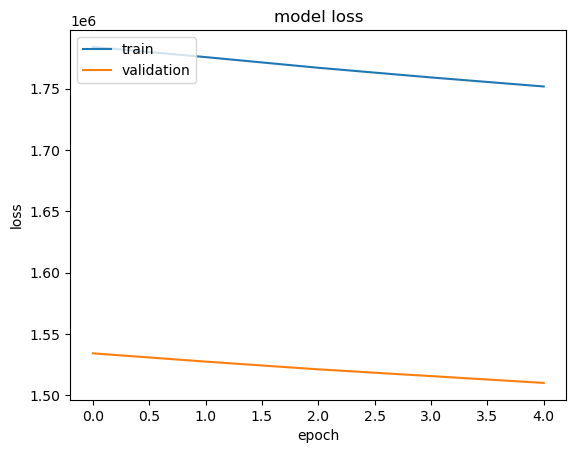

In [25]:
# plot the training and validation loss here 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

# now we use the two hidden layer for the comparison of the loss

In [30]:
# import library for regression problem
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf

df = sns.load_dataset('diamonds')

# preprocessing
X = df.drop('price',axis=1)
y= df['price']

# encode the categorical variable 
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# Train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Standard the data 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]), # input layer without any activation function
    tf.keras.layers.Dense(32,activation='relu'),
     tf.keras.layers.Dense(16,activation='relu'),#hidden layer with 16 neurons and relu function 
    tf.keras.layers.Dense(1) # output layer with 1 neuron
])

# compile the model 
model.compile(optimizer='adam',loss='mean_squared_error')
# use the call back system
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', # thsi command is used to monitor the validation loss
                               patience=2, # number of epochs to wait before stopping the training
                               restore_best_weights=True) # This command is used to restore the best weights of the model

history = model.fit(
    X_train,y_train,
    epochs=5,
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping]
)

Epoch 1/5
1079/1079 [==============================] - 83s 63ms/step - loss: 18321228.0000 - val_loss: 2995839.5000
Epoch 2/5
1079/1079 [==============================] - 55s 51ms/step - loss: 2315562.5000 - val_loss: 1590657.1250
Epoch 3/5
1079/1079 [==============================] - 61s 57ms/step - loss: 1838799.0000 - val_loss: 1484353.7500
Epoch 4/5
1079/1079 [==============================] - 66s 61ms/step - loss: 1761299.1250 - val_loss: 1439829.1250
Epoch 5/5
1079/1079 [==============================] - 70s 65ms/step - loss: 1708324.1250 - val_loss: 1407263.5000


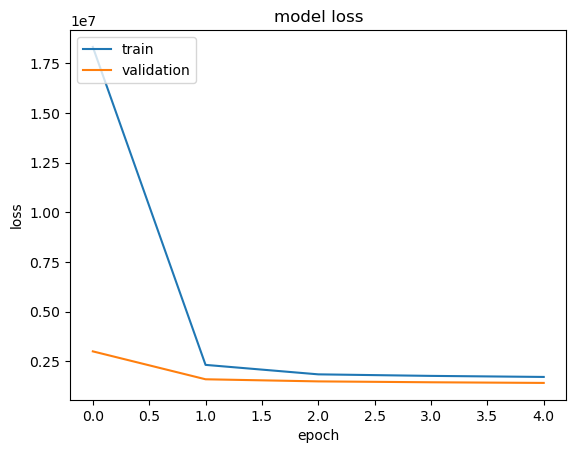

In [31]:
# plot the training and validation loss here 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

its means when we give the wieghts and bisa at the start on the first hidden layer this was take randomize and when it go back with backpropagation derivative pass through the second hidden layer 